In [10]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import random
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from data_loader import get_merged_scores_df
from plots_helper import *

Index(['mut_id', 'md5', 'pmd_id', 'nr', 'prot_acc_version', 'snp_id',
       'mut_real', 'wt', 'mut', 'prot_pos', 'chrom', 'chrom_pos', 'ref_allele',
       'alt_allele', 'function', 'source', 'crossref', 'function_summarized',
       'class', 'sift', 'polyphen2_HVAR', 'metarnn', 'revel', 'mvp',
       'cadd_raw', 'integrated_fitCons', 'phyloP17way_primate',
       'phastCons17way_primate', 'bStatistic', 'esm1b_t33_650M_UR50S',
       'esm1v_t33_650M_UR90S', 'esm2_t33_650M_UR50D', 'prottrans_bert_bfd',
       'prottrans_t5_xl_u50', 'vespa', 'proteinbert', 'sequnet', 'protbert',
       'unirep', 'conservation'],
      dtype='object')
(7179, 40)
Effect       3818
No-effect    1777
Knock-out    1584
Name: class, dtype: int64


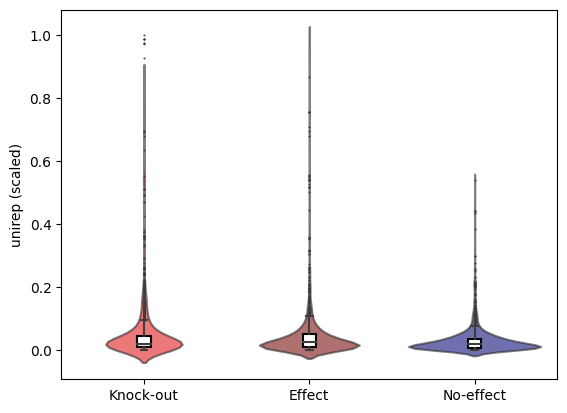

In [12]:
PROPS = {'boxprops':{'facecolor':'white', 'edgecolor':'black', 'zorder': 2}}
#     'medianprops':{'color':'green'},
#     'whiskerprops':{'color':'blue'},
#     'capprops':{'color':'yellow'}
# }

def plot_pmd_violin(df, method_name):
    plt.cla()

    sns.boxplot(data=df, x="class", y="pred", width=0.08, fliersize=.5, **PROPS)# flierprops={"marker": ""}) **PROPS
    ax = sns.violinplot(data=df, x="class", y="pred", inner=None, palette=pmd_colors_dict, order=pmd_class_order)
    plt.setp(ax.collections, alpha=.6)

    plt.ylabel(method_name + " (scaled)")
    plt.xlabel("")

    # plt.show()
    plt.savefig(home_dir+f"models/aa_common/plots_scores_violin/pmd/{method_name}.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)


df = get_merged_scores_df("pmd", home_dir)
for i, method_name in enumerate(method_names):
    # method_name = "esm1b_t33_650M_UR50S"
    if method_name=="random_classifier": df[method_name] = [random.uniform(0, 1) for i in range(df.shape[0])]
    df["pred"]=(df[method_name]-df[method_name].min())/(df[method_name].max()-df[method_name].min()) # scaling prediction scores between [0, 1]
    plot_pmd_violin(df, method_name)
    # break

Index(['clinvar_id', 'gene_symbol', 'gene_id', 'snp_id', 'chrom_acc_version',
       'chrom_pos', 'ref_allele', 'alt_allele', 'prot_acc_version', 'prot_pos',
       'wt', 'mut', 'class', 'chrom', 'sift', 'polyphen2_HVAR', 'metarnn',
       'revel', 'mvp', 'cadd_raw', 'integrated_fitCons', 'phyloP17way_primate',
       'phastCons17way_primate', 'bStatistic', 'wt_population',
       'mut_poulation', 'wt_freq', 'mt_freq', 'esm1b_t33_650M_UR50S',
       'esm1v_t33_650M_UR90S', 'esm2_t33_650M_UR50D', 'prottrans_bert_bfd',
       'prottrans_t5_xl_u50', 'vespa', 'proteinbert', 'sequnet', 'protbert',
       'unirep', 'conservation'],
      dtype='object')
(9472, 39)
Likely-pathogenic    4162
Pathogenic           2305
Rare                 1983
Common               1022
Name: class, dtype: int64


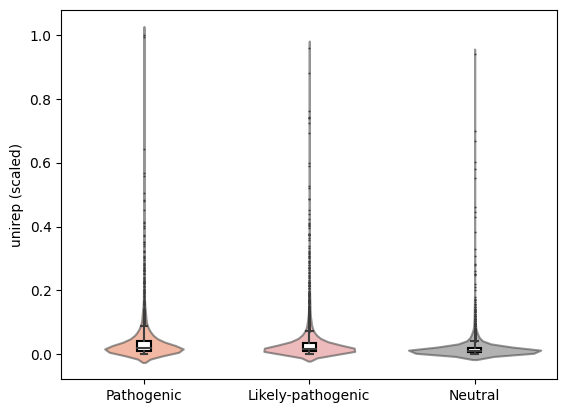

In [13]:
PROPS = {'boxprops':{'facecolor':'white', 'edgecolor':'black', 'zorder': 2}}
#     'medianprops':{'color':'green'},
#     'whiskerprops':{'color':'blue'},
#     'capprops':{'color':'yellow'}
# }

def plot_patho_violin(df, method_name):
    plt.cla()
    df.loc[(df["class"]!="Pathogenic") & (df["class"]!="Likely-pathogenic"), "class"] = "Neutral"
    sns.boxplot(data=df, x="class", y="pred", width=0.08, fliersize=.5, **PROPS)# flierprops={"marker": ""}) **PROPS
    ax = sns.violinplot(data=df, x="class", y="pred", inner=None, palette=patho_colors_dict, order=patho_class_order)
    plt.setp(ax.collections, alpha=.6)

    plt.ylabel(method_name + " (scaled)")
    plt.xlabel("")

    # plt.show()
    plt.savefig(home_dir+f"models/aa_common/plots_scores_violin/patho/{method_name}.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)


df = get_merged_scores_df("patho", home_dir)
for i, method_name in enumerate(method_names):
    if method_name=="random_classifier": df[method_name] = [random.uniform(0, 1) for i in range(df.shape[0])]
    df["pred"]=(df[method_name]-df[method_name].min())/(df[method_name].max()-df[method_name].min()) # scaling prediction scores between [0, 1]
    plot_patho_violin(df, method_name)
    # if i==1: break

Index(['snp_id', 'chrom_acc_version', 'chrom_pos', 'ref_allele', 'alt_allele',
       'prot_acc_version', 'prot_pos', 'wt', 'mut', 'wt_population',
       'mut_poulation', 'wt_freq', 'mt_freq', 'class', 'chrom', 'sift',
       'polyphen2_HVAR', 'metarnn', 'revel', 'mvp', 'cadd_raw',
       'integrated_fitCons', 'phyloP17way_primate', 'phastCons17way_primate',
       'bStatistic', 'n_methods_having_preds', 'esm1b_t33_650M_UR50S',
       'esm1v_t33_650M_UR90S', 'esm2_t33_650M_UR50D', 'prottrans_bert_bfd',
       'prottrans_t5_xl_u50', 'vespa', 'proteinbert', 'sequnet', 'protbert',
       'unirep', 'conservation'],
      dtype='object')
(26409, 37)
Common        6976
Ultra-rare    6957
Singleton     6955
Rare          5521
Name: class, dtype: int64


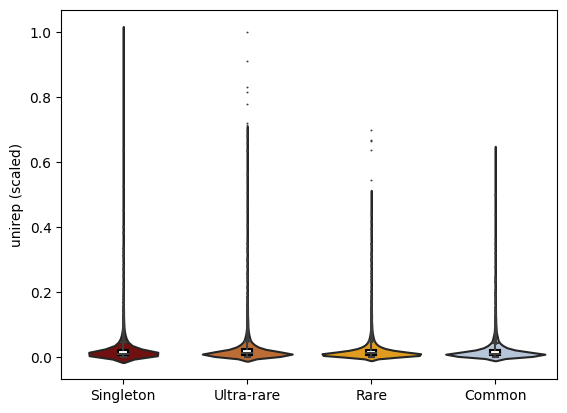

In [14]:
PROPS = {'boxprops':{'facecolor':'white', 'edgecolor':'black', 'zorder': 2}}
#     'medianprops':{'color':'green'},
#     'whiskerprops':{'color':'blue'},
#     'capprops':{'color':'yellow'}
# }

def plot_popu_freq_violin(df, method_name):
    plt.cla()

    sns.boxplot(data=df, x="class", y="pred", width=0.08, fliersize=.5, **PROPS)# flierprops={"marker": ""}) **PROPS
    ax = sns.violinplot(data=df, x="class", y="pred", inner=None, palette=popu_freq_colors_dict, order=popu_freq_class_order)
    # plt.setp(ax.collections, alpha=.6)

    plt.ylabel(method_name + " (scaled)")
    plt.xlabel("")

    # plt.show()
    plt.savefig(home_dir+f"models/aa_common/plots_scores_violin/popu_freq/{method_name}.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)


df = get_merged_scores_df("popu_freq", home_dir)
for i, method_name in enumerate(method_names):
    # method_name = "esm1b_t33_650M_UR50S"
    if method_name=="random_classifier": df[method_name] = [random.uniform(0, 1) for i in range(df.shape[0])]
    df["pred"]=(df[method_name]-df[method_name].min())/(df[method_name].max()-df[method_name].min()) # scaling prediction scores between [0, 1]
    plot_popu_freq_violin(df, method_name)
    # break